機械学習や深層学習だけではなく、いろいろな場面で数値計算というのが必要になったり、あるいはただ便利だったりします。pythonで数値計算をしたい時は、pythonだけで足りる場合もありますが、少し高度な数学になるとnumpy（ナムパイ、或いはナムピー）というライブラリーのありがたさがわかります。今回はnumpyについて、基礎的な概念といくつか便利な関数を紹介していきます。

# 前提知識・準備

{% assign lnk = site.python | where: "url", "/python/python_intro.html" | first %}
- [{{ lnk.title }}]({{ lnk.url | relative_url }})
- numpyが使えるようになっている

# numpyを使うには

numpyはライブラリーなので、使いたいときはそれを宣言する必要があります（もちろんその前にインストールが必要です）。ここで、pythonでのライブラリー宣言、すなわち`import`文について簡単な説明をします。

まず、ライブラリーを宣言したい時はそのまま`import ライブラリー名`と書けばいいです。今回の場合はnumpyを使いたいので、次を書きましょう：

In [1]:
import numpy
numpy.pi

3.141592653589793

簡単ですね。

ライブラリーの中に入っている定数や関すを使いたい時は、上記のようにライブラリー名を書かなければいけません。一般的にnumpyは頻繁に使われ、毎回`numpy.何か`と書くのがめんどくさいので、`numpy`を`np`に**rename**することができます。そのためには次のように`import`文を変えます。

In [2]:
import numpy as np
np.pi

3.141592653589793

`import numpy as`の後ろは好きな名前を付けてもいいのですが、一般的にnumpyはnpと略されることが多いので、今後もその略し方を採用します。ただし、ドキュメンテーションや、コードではない文脈では、`np.何か`ではなく`numpy.何か`と書くことにします。なぜなら、コードでは略し方げ明記されていますが、一般的に話す時には紛らわしうなるからです。

# pythonの配列とnumpyの配列

pythonでは`arr = [1, 2, 3]`のように配列を定義します。しかし、pythonの配列は当然プログラミングの世界で使う配列の性質や機能を持っていて、数値計算には向いていません。例えば、2つのベクトルを`a = [1, 2, 3]`と`b = [2, 3, 4]`と定義したとき、数学ではそれらを足し算できますが、pythonでは足し算ができません。試してみましょう。

In [3]:
a = [1, 2, 3]
b = [2, 3, 4]
a + b

[1, 2, 3, 2, 3, 4]

エラーが出ると思いきや、配列が連接されました。一般的なプログラミングでは、ベクトルの足し算よりこのような使い方が多いので、pythonを作った人たちはこの仕様を採用したのです。

足し算に関してはたまたま意味的に似た動作があったのですが、実は掛け算も注意しなければいけません。数学では

$$
3\begin{pmatrix}
1 \\
2 \\
3
\end{pmatrix} = \begin{pmatrix}
3 \\
6 \\
9
\end{pmatrix}
$$

となります。しかし、pythonではどうでしょう。

In [4]:
3 * [1, 2, 3]

[1, 2, 3, 1, 2, 3, 1, 2, 3]

同じ配列が3回続く配列ができました。これもプログラミングで比較的良く使われる動作だから、このように定義されています。

このように、配列には注意をしなければいけません。勘違いして使うと、後から問題を探すのが難しいです。幸い、引き算や割り算に関しては何も定義されていませんので、配列同士を引き算したり割り算したりしようとすると、普通にエラーが出ます。

In [5]:
[1, 2, 3] - [2, 3, 4]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
[1, 2, 3] / [1, 1, 1]

一方、numpyの配列は、四則演算やその他の演算もできます。例えば：

In [ ]:
np.array([1, 2, 3]) + np.array([2, 3, 4])

しかし、これ以上話す前に、numpyの配列の特徴について述べることにします。

# `numpy.ndarray`

numpyでは、**n次元配列**を適宜することができます。そしてその型の名前はもちろん`ndarray`（**n**-**d**imensional **array**）と呼びます。`ndarray`は、一般的にpythonの配列に対し`numpy.array`という関数を呼ぶことで作れます。つまり、ベクトル$\begin{pmatrix}1 & 2 & 3\end{pmatrix}$を作りたければ、以下のように書きます。

In [ ]:
np.array([1, 2, 3])

また、行列を作りたければ、以下のように作ります。

In [ ]:
np.array([
    [1, 2, 3],
    [2, 3, 4],
    [3, 4, 5]
])

行列は2次元配列ですが、numpyでは文字通り3次元や4次元、12345678次元配列も作れます。そして、イメージでしか無いが、n次元配列と言われたら、

> 数の配列の配列．．．の配列

の中に、「の配列」がn個あると思ってください。

## よく使う`numpy.ndarray`の性質

### `shape`

numpy配列の次元と要素数を調べたいとき、`x.shape`と書くと、**タプル**（中身が定数の配列）が返ってきます。

In [ ]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
x.shape

これはつまり次のことを言っています：

> `x`は2つの要素を持ち、それぞれ配列で3つずつ要素持つ

ということです。実際にコードを見ても、同じことが言えますね。

では、次の2つの例も見てみましょう。

In [ ]:
x = np.array([1, 2, 3])
y = np.array([[1, 2, 3]])
print(x.shape, y.shape)

どういう意味でしょう。

実は、numpyで配列の形で意識しなければいけないところがあります。上の二つは、厳密に言うと`x`は1次元配列、`y`は2次元配列（`x.shape`の要素=`x`の次元の数）。数学で考える時に、上はどちらも同じものとして扱われますが、numpyでは違います。この後行列の掛け算等の話をする時にも出て来ますが、配列の形を合わせなければいけない時があります。その時に、`x`を`y`にしたり、`y`を`x`にしたりする必要があります。その変換をどう行うのかというと、`reshape`という関数を使います。

## `reshape`

簡単に言うと、`reshape`というのは文字通り配列の形を変えるための関数です。早速使ってみましょう。

In [ ]:
x = np.array([1, 2, 3])
print(x.shape)
x = x.reshape(3, 1)
print(x.shape)

このように、1次元配列を2次元配列に変換することができます。もう一つ例を試してみましょう。

In [ ]:
x = np.array([1, 2, 3, 4])
print(x.shape)
x = x.reshape(2, 2)
print(x.shape)
print(x)


このような使い方をすると、要素の数の配置を変えることもできます。しかし、ここでもちろん注意しなければいけない点があり、`reshape`の中に元の配列と合わないものを入れたら当然エラーげ出てきます。

In [ ]:
x = np.array([1, 2, 3])
x.reshape(3, 3)

## `T`

最後に、行列を扱う時に役に立つものを紹介しましょう。数学で行列の転置を示す時に、$M^T$と書きます。これに因んで、numpyも同じように、`x.T`で転置をとることができます。

In [ ]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
x.T

他にもnumpy配列の特徴はいっぱいありますが、気になる人は[numpyのドキュメンテーション](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)を読みましょう。

# `numpy.ndarray`に対する演算

## 数との演算

配列同士の演算を除き、numpy配列に対し何か演算をする時、それが全ての要素に適用されます。例えば：

In [ ]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
3 * x

In [ ]:
x + 10

In [ ]:
x ** 1.23 # xの1.23乗

In [ ]:
np.e ** x # eのx乗

In [ ]:
3 / x

というように、全ての要素に対し、四則演算、そしてべき乗算ができます。

また、数学で良く使う三角関数や、べき乗関数等、絶対値関数、対数関数、などなど[numpyの中にある様々な関数](https://docs.scipy.org/doc/numpy/reference/routines.math.html)を`x`の各要素に対して計算できます。

In [ ]:
np.sin(x)

In [ ]:
np.cosh(x)

In [ ]:
np.log(x) # eに対するlog

In [ ]:
np.radians(x) # 角度をラジアンに変換

なお、上の全ての関数はただの数に対しても使うことができます。例えば

In [ ]:
np.cos(0)

## `numpy.ndarray`同士の演算とBroadcasting

numpyで**次元が同じもの同士**に対して演算したい時、そのまま演算子を使えば、結果が出てきます。その時、演算はそれぞれの要素毎に行われます。つまり：

In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x + y

In [ ]:
x * y

In [ ]:
x ** y

しかし、numpyの力は、**次元が違っても演算できる**というところにあります。例えば、ある行列の全ての行に、ベクトルを足したいとき、以下を書けばいいです。

In [ ]:
M = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
M + x

しかし、これで何でもできるわけではありません。次の例をみてみましょう。

In [ ]:
M = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

M + x

何が起きたのかというと、**shapeの後ろが不一致**なので、演算ができなかったです。

numpyのこの機能のことを**broadcasting**と呼びます。broadcastingの詳しい説明は[ドキュメンテーション](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)に書いてありますので、気になる人は読みましょう。いずれにしても、一番簡単な捉え方は**shapeの後ろが一致してれば演算できる**ということです。

もういくつかの例をみてみましょう。

In [ ]:
M = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])
x = np.array([1, 2])
print(M.shape, x.shape)
M * x

In [ ]:
T = np.array([
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [7, 8, 9],
        [10, 11, 12]
    ]
])
M = np.array([
    [1, 1, 1],
    [2, 2, 2]
])

T - M

## 行列積

数値解析で行列積は必要不可欠です。行列の要素毎の積ではなく、行列積をとりたい時は`@`演算子を使います。ただし、行列の`shape`はもちろん合致しなければいけません。これは数学と同じで、`x.shape = (m, n)`と`y.shape = (n, k)`なら、`(x @ y).shape = (m, k)`となります。

In [ ]:
M1 = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
M2 = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
    
])

M3 = M1 @ M2

print(M1.shape, M2.shape, M3.shape)
M3

しかし、実はここでもbroadcastingが使えます！例えば、配列`A`が行列の配列だとして、`A`の全ての要素に対し`B`を書けたいとき、以下のように書けばできます。

In [ ]:
A = np.array([
    [
        [1, 2],
        [2, 1],
        [1, 2]
    ],
    [
        [2, 3],
        [3, 2],
        [2, 3]
    ],
    [
        [3, 4],
        [4, 3],
        [3, 4]
    ]
])

B = np.array([
    [-1, 0],
    [0, -1]
])

C = A @ B
print(A.shape, B.shape, C.shape)
C

最後に、1次元配列（ベクトル）と行列の行列積をとるときは、ベクトルが左ならば行ベクトル、右ならば列ベクトルとして扱われます。その時、行列のそれぞれの次元に合わせなければならないので注意しましょう。

In [ ]:
M1 = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
A = np.array([1, 1])

print(A.shape, M1.shape)
A @ M1

In [ ]:
print(M1.shape, A.shape)
M1 @ A # 次元が合わない

## 次元を変える演算

時々、というかかなりの頻度で、$\sum$や$\prod$を使う式があります。例えば以下の式をみてみましょう。

$$
S = \sum_i^N{a_i}
$$

この時、$a$が配列だと考えて、$S$は配列を一つの数にしたものですよね。このような計算はnumpyでは以下のように書きます。

In [ ]:
a = np.array([1, 2, 3, 4])
np.sum(a)

しかし、これだけだとつまらないですね。次は行列に対して`numpy.sum`を使ってみましょう。

In [ ]:
M = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
np.sum(M)

同じく全ての要素の和が出力されますね。でも実は、違う足し方を指定することができます。[`numpy.sum`の定義](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html#numpy.sum)を見ると、`axis`という引数を受け取ることがわかります。この`axis`というのは、どの次元に対して和をとるか、という意味です。指定してみて結果を確認しましょう。

In [ ]:
np.sum(M, axis=0)

In [ ]:
np.sum(M, axis=1)

何が起こっているかわかりますか？

numpy配列は「数の配列の配列の配列．．．」だと先程言いました。この中で、何番目「配列」に対して和をとるかというのが`axis`の値です。`axis=0`の時は一番右の配列、つまり一番外側の配列に対して和をとるという意味になります。

これをわかりやすくするために、次の3次元配列を考えましょう。

In [ ]:
T = np.array([
    [
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [7, 8, 9],
        [10, 11, 12]
    ]
])
T

ここで`T`のことを、「二つの行列を重ねたもの」だと思ってください。この時、それぞれの`axis`で和をとるとどうなるかみていきましょう。

In [ ]:
np.sum(T, axis=0)

`axis=0`は一番外側の配列を指すので、重ねた行列を要素毎足すのと同じです。つまり

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix} + 
\begin{pmatrix}
7 & 8 & 9 \\
10 & 11 & 12
\end{pmatrix}
$$

In [ ]:
np.sum(T, axis=1)

`axis=1`は2番目の配列という意味なので、それぞれの行列の行の和という演算になります。つまり

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix} \to
\begin{pmatrix} 1 & 2 & 3 \end{pmatrix} + \begin{pmatrix} 4 & 5 & 6 \end{pmatrix}
$$

$$
\begin{pmatrix}
7 & 8 & 9 \\
10 & 11 & 12
\end{pmatrix} \to
\begin{pmatrix} 7 & 8 & 9 \end{pmatrix} + \begin{pmatrix} 10 & 11 & 12 \end{pmatrix}
$$

In [ ]:
np.sum(T, axis=2)

`axis=2`は3番目の配列という意味なので、それぞれの行列の、それぞれの行の、要素の和という意味になります。つまり

$$
\begin{aligned}
\begin{pmatrix} 1 & 2 & 3 \end{pmatrix} &\to 1 + 2 + 3 \\
\begin{pmatrix} 4 & 5 & 6 \end{pmatrix} &\to 4 + 5 + 6 \\
& \\
\begin{pmatrix} 7 & 8 & 9 \end{pmatrix} &\to 7 + 8 + 9 \\
\begin{pmatrix} 10 & 11 & 12 \end{pmatrix} &\to 10 + 11 + 12 \\
\end{aligned}
$$

このような計算は、ある次元をreduceすると言います。`numpy.sum`の他に、`numpy.prod`等もあります。

# `numpy`で数値を生成する

多次元配列の演算も便利ですが、numpyのデータ生成機能もとても便利です。これからよく使う関数について簡単に解説していきます。

## `numpy.linspace`

点`A`から点`B`までの（多次元）直線上にある点を`n`個、等間隔で生成してくれます。

In [ ]:
np.linspace(0, 10, 5)

In [ ]:
A = np.array([0, 0])
B = np.array([10, 5])
np.linspace(A, B, 5)

In [ ]:
A = np.array([0, 0, 0])
B = np.array([1, -5, 4])
np.linspace(A, B, 5)

## `numpy.arange`

`A`から`B`未満の数を間隔`t`で生成してくれます。

In [6]:
np.arange(0, 50, 5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

## `numpy.ones`と`numpy.zeros`

それぞれ1か0の配列を生成してくれます。

In [7]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [8]:
np.zeros( (3, 5) )

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## `numpy.ones_like`と`numpy.zeros_like`

ある配列と同じ次元の、1か0の配列を生成してくれます。

In [9]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

np.ones_like(x)

array([[1, 1, 1],
       [1, 1, 1]])

In [10]:
np.zeros_like(x)

array([[0, 0, 0],
       [0, 0, 0]])

## `numpy.meshgrid`

1次元配列を`n`個受け取って、それぞれの組み合わせからなる座標行列を生成してくれます。段階的に例をみていきましょう。

In [11]:
x = np.linspace(0, 4, 5)
y = np.linspace(0, -9, 10)
print(x)
print(y)

[0. 1. 2. 3. 4.]
[ 0. -1. -2. -3. -4. -5. -6. -7. -8. -9.]


これらに対し`numpy.meshgrid`を使うと、それぞれ`x`と`y`の行列が返ってきます。

In [12]:
xx, yy = np.meshgrid(x, y)
print(xx)
print()
print(yy)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]

[[ 0.  0.  0.  0.  0.]
 [-1. -1. -1. -1. -1.]
 [-2. -2. -2. -2. -2.]
 [-3. -3. -3. -3. -3.]
 [-4. -4. -4. -4. -4.]
 [-5. -5. -5. -5. -5.]
 [-6. -6. -6. -6. -6.]
 [-7. -7. -7. -7. -7.]
 [-8. -8. -8. -8. -8.]
 [-9. -9. -9. -9. -9.]]


この行列は同じ形をしているので、重ねてみると、対応し合う要素が座標になります。つまり、`xx[1][1]`と`yy[1][1]`を例にとると、それが点`(1, -1)`を意味します。

ここは例外的に、イメージしてもらうために一回だけ別のライブラリーを使って、上のデータをプロットします。

In [13]:
import matplotlib
import matplotlib.pyplot as plt

(-10, 1)

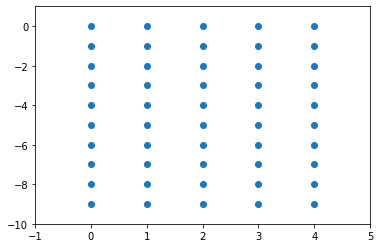

In [14]:
plt.scatter(xx, yy)
plt.xlim(-1, 5)
plt.ylim(-10, 1)

このように、`xx`と`yy`はそれぞれの点のx座標とy座標を表しています。なお、同じように、`xx, yy, zz = np.meshgrid(x, y, z)`というように描くと、平面ではなく立方体の形をした点ができ、同じように次元をもっと増やすこともできます。

## `numpy.random`

[`numpy.random`というサブモジュールには](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)、乱数を生成するための関数があります。ここでは一番良く使う`numpy.random.rand`だけを紹介します。他の関数はぜひ各自で調べましょう。

`np.random.rand`は、一様分布に従う点を好きな次元で生成してくれます。

In [15]:
np.random.rand(5)

array([0.29183718, 0.34068106, 0.53165653, 0.73773437, 0.23106769])

In [16]:
np.random.rand(3, 3)

array([[0.08417681, 0.04500776, 0.04353293],
       [0.41719983, 0.28308772, 0.09892462],
       [0.17590245, 0.2853008 , 0.43102579]])

# まとめ

numpyの基礎的な概念と便利な関数について解説しました。しかし、これはnumpyの表面を触っただけであり、深く掘れば掘るほど面白い関数があります。なので、これだけで満足せずに、何か新しいことをしたければぜひ自分たちで調べましょう。それから、[numpyのドキュメンテーション](https://docs.scipy.org/doc/numpy/reference/index.html)に一度目を通してみましょう。どんな機能があるか、どんな関数があるか、関数名だけで分かるものもあるので、大雑把でもいいので把握しておきましょう。